Number of Omega-automaton states (including the trap state): 3


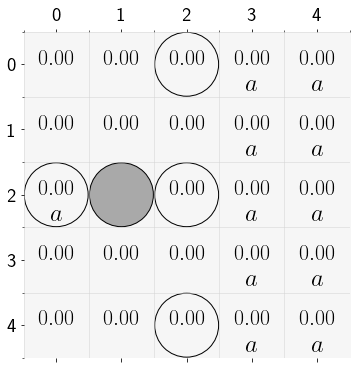

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

# Specification
ltl = 'F G a & G !b'
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (5,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'T',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['T',  'B',  'T',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'T',  'E',  'E']
])

label = np.array([
    [(),        (),        (),     ('a',),        ('a',)],
    [(),        (),        (),     ('a',),        ('a',)],
    [('a',),    (),        (),     ('a',),        ('a',)],
    [(),        (),        (),     ('a',),        ('a',)],
    [(),        (),        (),     ('a',),        ('a',)],
],dtype=np.object)

# discount = 0.999999
# discountB = 0.9999
# discountB = 0.99
reward = np.zeros(shape)
# reward[3,0] = 1-discountB

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=6,second_agent=('b',))  # Use figsize=4 for smaller figures
grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [2]:
oa.__dict__

{'oa_type': 'dra',
 'q0': 0,
 'delta': [{(): 0, ('a',): 0, ('b',): 1, ('a', 'b'): 1},
  {(): 1, ('a',): 1, ('b',): 1, ('a', 'b'): 1},
  {(): 2, ('a',): 2, ('b',): 2, ('a', 'b'): 2}],
 'acc': [{(): [False], ('a',): [True], ('b',): [None], ('a', 'b'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('a', 'b'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('a', 'b'): [None]}],
 'shape': (1, 3),
 'spot_oa': None,
 'eps': [[], [], []]}

In [3]:

value, stats = csrl.shapley(T=2**15)


np.save('2p_value.npy',value)
# value = np.load('value2.npy')

In [4]:
print(stats[0])

         487587849 function calls in 224.079 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
328728576  124.568    0.000  124.568    0.000 {built-in method builtins.min}
  7667712    6.876    0.000   77.597    0.000 <__array_function__ internals>:2(amax)
  7667712    5.370    0.000   69.075    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
  7667712   11.666    0.000   63.705    0.000 C:\Users\alper\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2551(amax)
  7667712   15.010    0.000   52.040    0.000 C:\Users\alper\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:73(_wrapreduction)
  7667712   29.575    0.000   29.575    0.000 {method 'reduce' of 'numpy.ufunc' objects}
 89849857   11.184    0.000   11.184    0.000 {built-in method builtins.len}
  7667712   10.730    0.000   10.730    0.000 {built-in method numpy.zeros}
  7667712    6.084    0.000    6.084    0.000 C:\Users\alper

In [5]:
csrl.plot(value)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [6]:
policy, policy_ = csrl.get_greedy_policies(value)
csrl.plot(policy=policy)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [7]:
np.save('value',value)